💡 Question-1:

Given preorder of a binary tree, calculate its **[depth(or height)](https://www.geeksforgeeks.org/write-a-c-program-to-find-the-maximum-depth-or-height-of-a-tree/)** [starting from depth 0]. The preorder is given as a string with two possible characters.

1. ‘l’ denotes the leaf
2. ‘n’ denotes internal node

The given tree can be seen as a full binary tree where every node has 0 or two children. The two children of a node can ‘n’ or ‘l’ or mix of both.

**Examples :**

Input  : nlnll
Output : 2
Explanation :
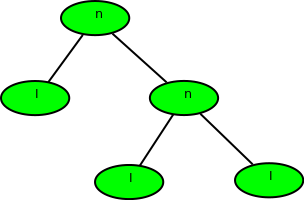
Input  : nlnnlll
Output : 3
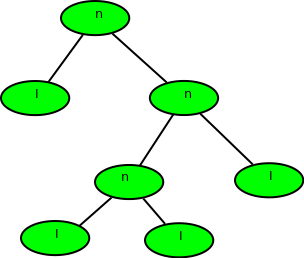

In [1]:
def calculate_tree_height(preorder):
    depth = 0

    def traverse(index):
        nonlocal depth
        if index >= len(preorder):
            return index
        if preorder[index] == 'n':
            depth += 1
            index = traverse(index + 1)
            index = traverse(index + 1)
        return index

    traverse(0)
    return depth

# Testing the algorithm
preorder = 'nlnll'
print(calculate_tree_height(preorder))  # Output: 2

preorder = 'nlnnlll'
print(calculate_tree_height(preorder))  # Output: 3


2
3


💡 Question-2:

Given a Binary tree, the task is to print the **left view** of the Binary Tree. The left view of a Binary Tree is a set of leftmost nodes for every level.

**Examples:**

***Input:***

            4

          /   \

        5     2

             /   \

            3     1

           /  \

          6    7

***Output:** 4 5 3 6*
**Explanation:**
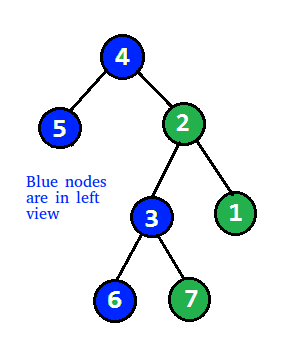

***Input:***

                    1

                  /   \

                2       3

                 \

                   4

                     \

                        5

                           \

                             6

**Output:** 1 2 4 5 6
</aside>

In [2]:
class Node:
    def __init__(self, value):
        self.data = value
        self.left = None
        self.right = None


def print_left_view(root):
    if root is None:
        return

    queue = []
    queue.append(root)

    while queue:
        level_size = len(queue)
        print_node = True

        for i in range(level_size):
            node = queue.pop(0)
            if print_node:
                print(node.data, end=' ')
                print_node = False

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        if print_node:
            # No more nodes at the next level
            print()

# Testing the algorithm
root = Node(4)
root.left = Node(5)
root.right = Node(2)
root.right.left = Node(3)
root.right.right = Node(1)
root.right.left.left = Node(6)
root.right.left.right = Node(7)

print("Left view of Binary Tree:")
print_left_view(root)
# Output: 4 5 3 6

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.right = Node(4)
root.left.right.right = Node(5)
root.left.right.right.right = Node(6)

print("\nLeft view of Binary Tree:")
print_left_view(root)
# Output: 1 2 4 5 6


Left view of Binary Tree:
4 5 3 6 
Left view of Binary Tree:
1 2 4 5 6 

💡 Question-3:

Given a Binary Tree, print the Right view of it.

The right view of a Binary Tree is a set of nodes visible when the tree is visited from the Right side.

**Examples:**

**Input:**

         1

      /     \

   2         3

/   \       /  \

4     5   6    7

             \

               8

**Output**: 

Right view of the tree is 1 3 7 8

**Input:**

         1

       /

    8

  /

7

**Output**: 

Right view of the tree is 1 8 7

In [4]:
class Node:
    def __init__(self, value):
        self.data = value
        self.left = None
        self.right = None


def print_right_view(root):
    if root is None:
        return

    rightmost_nodes = {}

    def traverse(node, depth):
        if node is None:
            return

        if depth not in rightmost_nodes:
            rightmost_nodes[depth] = node.data

        traverse(node.right, depth + 1)
        traverse(node.left, depth + 1)

    traverse(root, 0)

    sorted_depths = sorted(rightmost_nodes.keys())
    for depth in sorted_depths:
        print(rightmost_nodes[depth], end=' ')
    print()


# Testing the algorithm
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
root.right.right.right = Node(8)

print("Right view of Binary Tree:")
print_right_view(root)
# Output: 1 3 7 8

root = Node(1)
root.left = Node(8)
root.left.left = Node(7)

print("\nRight view of Binary Tree:")
print_right_view(root)
# Output: 1 8 7

Right view of Binary Tree:
1 3 7 8 

Right view of Binary Tree:
1 8 7 


💡 Question-4:

Given a Binary Tree, The task is to print the **bottom view** from left to right. A node **x** is there in output if x is the bottommost node at its horizontal distance. The horizontal distance of the left child of a node x is equal to a horizontal distance of x minus 1, and that of a right child is the horizontal distance of x plus 1.

**Examples:**

**Input:**

             20

           /     \

        8         22

    /      \         \

5         3        25

        /    \

   10       14

**Output:** 5, 10, 3, 14, 25.

**Input:**

             20

           /     \

        8         22

    /      \      /   \

 5         3    4     25

         /    \

     10       14

**Output:**

5 10 4 14 25.

**Explanation:**

If there are multiple bottom-most nodes for a horizontal distance from the root, then print the later one in the level traversal.

**3 and 4** are both the bottom-most nodes at a horizontal distance of 0, we need to print 4.

In [5]:
from collections import deque

class Node:
    def __init__(self, value):
        self.data = value
        self.left = None
        self.right = None


def print_bottom_view(root):
    if root is None:
        return

    queue = deque()
    queue.append((root, 0))

    horizontal_distances = {}

    while queue:
        node, distance = queue.popleft()
        horizontal_distances[distance] = node.data

        if node.left:
            queue.append((node.left, distance - 1))
        if node.right:
            queue.append((node.right, distance + 1))

    sorted_distances = sorted(horizontal_distances.keys())
    for distance in sorted_distances:
        print(horizontal_distances[distance], end=' ')
    print()


# Testing the algorithm
root = Node(20)
root.left = Node(8)
root.right = Node(22)
root.left.left = Node(5)
root.left.right = Node(3)
root.right.right = Node(25)
root.left.right.left = Node(10)
root.left.right.right = Node(14)

print("Bottom view of Binary Tree:")
print_bottom_view(root)
# Output: 5 10 3 14 25

root = Node(20)
root.left = Node(8)
root.right = Node(22)
root.left.left = Node(5)
root.left.right = Node(3)
root.right.left = Node(4)
root.right.right = Node(25)
root.left.right.left = Node(10)
root.left.right.right = Node(14)

print("\nBottom view of Binary Tree:")
print_bottom_view(root)
# Output: 5 10 4 14 25


Bottom view of Binary Tree:
5 10 3 14 25 

Bottom view of Binary Tree:
5 10 4 14 25 
